In [1]:
import pandas as pd
import pandas_datareader as pdr
import backtrader as bt
import backtrader.feeds as btfeed

c:\projects\python_projects\estrategia_backtrader\env\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
df = pdr.DataReader("ITUB4.SA", start='2015-1-1', end='2020-2-27', data_source='yahoo')

In [3]:
class PandasData(btfeed.feed.DataBase):
    params = (
        ('datetime', -1),
        ('open', -1),
        ('high', -1),
        ('low', -1),
        ('close', -1),
        ('volume', -1),
        ('openinterest', -1),
    )

In [4]:
class SMAs(bt.Strategy):

    def __init__(self):
        self.sma20 = bt.ind.SimpleMovingAverage(period=20)
        self.sma200 = bt.ind.SimpleMovingAverage(period=200)
        
    def next(self):
        if not self.position:
            if self.data.close[-1] > self.sma20 and self.sma20 > self.sma200:
                self.buy()
        else:
            if self.data.close[0] < self.sma20:
                self.sell()

In [5]:
class SmaCross(bt.Strategy):
    
    params = dict(
        pfast=50,
        pslow=200
    )

    def __init__(self):
        sma1 = bt.ind.SMA(period=self.p.pfast)
        sma2 = bt.ind.SMA(period=self.p.pslow)
        self.crossover = bt.ind.CrossOver(sma1, sma2)

    def next(self):
        if not self.position:
            if self.crossover > 0:
                self.buy()

        elif self.crossover < 0:
            self.close()

In [6]:
data = bt.feeds.PandasData(dataname=df)

Starting Portfolio Value: 100000.00
Final Portfolio Value: 110175.90


<IPython.core.display.Javascript object>


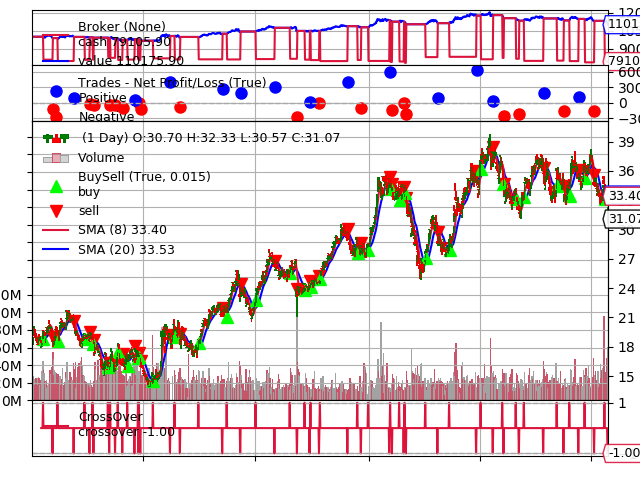

[[<Figure size 640x480 with 5 Axes>]]

In [7]:
cerebro = bt.Cerebro()
cerebro.broker.setcash(100000.0)
cerebro.addsizer(bt.sizers.FixedSize, stake=1000)
cerebro.addstrategy(SmaCross, pfast=8, pslow=20)
cerebro.adddata(data)
print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
cerebro.run()
print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())
cerebro.plot(style='candlestick', barup='green', bardown='red')